***Normal Task***

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd

# Read the CSV file into a data frame
data_frame = pd.read_csv('/content/imdb_top_1000.csv')


In [3]:
print(data_frame.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [4]:
column_names = data_frame.columns

In [5]:
column_names = data_frame.columns.tolist()
print(column_names)

['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']


In [6]:
average_rating = data_frame['IMDB_Rating'].mean()

In [7]:
# Print the average rating
print("Average Rating:", average_rating)

Average Rating: 7.949299999999999


In [8]:
# Extract the unique genres
unique_genres = data_frame['Genre'].unique()

In [9]:
# Count the number of unique genres
num_unique_genres = len(unique_genres)

In [10]:
# Print the number of unique genres
print("Number of Unique Genres:", num_unique_genres)

Number of Unique Genres: 202


Analysis

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from enum import unique
from sklearn import preprocessing

In [12]:
raw_df = pd.read_csv("/content/imdb_top_1000.csv")


In [13]:
raw_df.shape

(1000, 16)

In [14]:
raw_df.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


**Goal** is to predicting the IMDB rating based on the features available.

In [15]:
print("Variable: Released_Year")
print(raw_df[pd.to_numeric(raw_df["Released_Year"], errors='coerce').isnull()]["Released_Year"])
print("\n"+"*"*60)

print("Variable: Runtime")
print(raw_df[pd.to_numeric(raw_df["Runtime"], errors='coerce').isnull()]["Runtime"])
print("\n"+"*"*60)

print("Variable: Gross")
print(raw_df[pd.to_numeric(raw_df["Gross"], errors='coerce').isnull()]["Gross"])
print("\n"+"*"*60)

Variable: Released_Year
966    PG
Name: Released_Year, dtype: object

************************************************************
Variable: Runtime
0      142 min
1      175 min
2      152 min
3      202 min
4       96 min
        ...   
995    115 min
996    201 min
997    118 min
998     97 min
999     86 min
Name: Runtime, Length: 1000, dtype: object

************************************************************
Variable: Gross
0       28,341,469
1      134,966,411
2      534,858,444
3       57,300,000
4        4,360,000
          ...     
995            NaN
996            NaN
997     30,500,000
998            NaN
999            NaN
Name: Gross, Length: 1000, dtype: object

************************************************************


In [16]:
raw_df["Runtime"] = raw_df["Runtime"].str.replace("min","")
raw_df["Runtime"] = raw_df["Runtime"].str.strip()
raw_df["Runtime"] = raw_df["Runtime"].astype(int)
raw_df["Released_Year"] = raw_df["Released_Year"].replace("PG",np.nan)
#The variable is converted to float to handle null values. Null treatment will be done later on the script.
raw_df["Released_Year"] = raw_df["Released_Year"].astype(float)
raw_df["Gross"] = raw_df["Gross"].str.replace(",","").astype(float)

**EDA**

In [17]:
for i in raw_df.columns:
  print(i," : ",raw_df[i].dtype)

Poster_Link  :  object
Series_Title  :  object
Released_Year  :  float64
Certificate  :  object
Runtime  :  int64
Genre  :  object
IMDB_Rating  :  float64
Overview  :  object
Meta_score  :  float64
Director  :  object
Star1  :  object
Star2  :  object
Star3  :  object
Star4  :  object
No_of_Votes  :  int64
Gross  :  float64


In [18]:
raw_df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [19]:
raw_df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,1000.000000,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,1991.217217,122.891000,7.949300,77.971530,2.736929e+05,6.803475e+07
std,23.297025,28.093671,0.275491,12.376099,3.273727e+05,1.097500e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.741612e+05,8.075089e+07
max,2020.000000,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


After getting the first-level statistics, if the feature is of type 'float' or 'int', the function 'freq_table' is called to get information about symmetry, kurtosis, and the Spearman coefficient.

<ipython-input-30-8147b8043444>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_df[columnName])


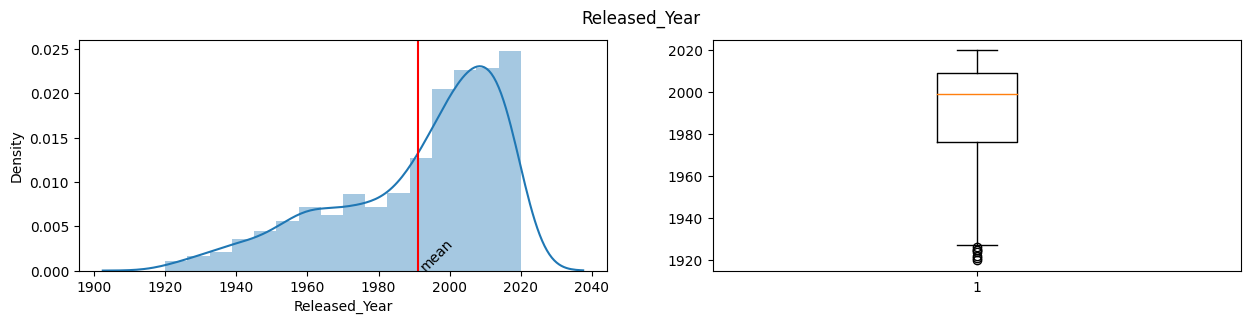

Skewness: -0.939346641352243
Kurtosis: -0.021431891218695487
count     999.000000
mean     1991.217217
std        23.297025
min      1920.000000
25%      1976.000000
50%      1999.000000
75%      2009.000000
max      2020.000000
Name: Released_Year, dtype: float64 
Pearson's Coefficient of Variation: 0.011699891223762334 
--------------------------------



In [ ]:
for columnName in raw_df.columns:

  if (raw_df[columnName].dtype == np.float64 or raw_df[columnName].dtype == np.int64) and raw_df[columnName].isnull().sum() != len(raw_df[columnName]):
    plt.figure(figsize = (15,3))
    plt.suptitle(columnName)
    plt.subplot(1,2,1)
    sns.distplot(raw_df[columnName])
    plt.axvline(raw_df[columnName].mean(), color= "red")
    plt.text(raw_df[columnName].mean(),0,'mean',rotation=45)
    plt.subplot(1,2,2)
    plt.boxplot(raw_df[~np.isnan(raw_df[columnName])][columnName])
    plt.show()
    print("Asimetría: {}".format(raw_df[columnName].skew()))
    print("Curtosis: {}".format(raw_df[columnName].kurt()))
    spearman = raw_df[columnName].std()/raw_df[columnName].mean()
    print(raw_df[columnName].describe(),"\nCoeficiente de variación de Pearson: {} \n--------------------------------\n".format(spearman))
  else:
    print(raw_df[columnName].describe(),"\n--------------------------------\n")

In [31]:
raw_df[~raw_df["Certificate"].isin(["G","PG","PG-13","R"])]["Certificate"].unique()

array(['A', 'UA', 'U', nan, 'Passed', 'TV-14', '16', 'TV-MA', 'Unrated',
       'GP', 'Approved', 'TV-PG', 'U/A'], dtype=object)

In [32]:
raw_df["Certificate"] = raw_df["Certificate"].str.replace("/","").replace("GP","PG")

mapping = {"A":"R","UA":"PG-13","U":"G", "TV-PG":"G", "TV-14":"PG-13", "TV-MA":"R"}

raw_df = raw_df.replace({"Certificate":mapping})

raw_df[~raw_df["Certificate"].isin(["G","PG","PG-13","R"])]["Certificate"].unique()

array([nan, 'Passed', '16', 'Unrated', 'Approved'], dtype=object)

In [33]:
raw_df = raw_df.replace({"Certificate":{"Passed":"G", "Approved":"G"}})

raw_df["Certificate"].unique()

array(['R', 'PG-13', 'G', nan, 'PG', '16', 'Unrated'], dtype=object)

In [34]:
raw_df["Certificate"] = raw_df["Certificate"].replace("16", np.nan).replace("Unrated",np.nan)

In [35]:
raw_df["Certificate"].unique()

array(['R', 'PG-13', 'G', nan, 'PG'], dtype=object)

In [36]:
raw_df = raw_df.replace({"Certificate":{
    "G":1,
    "PG":1,
    "PG-13":2,
    "R":3
}})

In [37]:
#MISSING VALUE ANALYSIS

In [38]:
raw_df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      1
Certificate      103
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [39]:
raw_df = raw_df[~pd.isnull(raw_df["Released_Year"])].copy()

In [40]:
raw_df["Released_Decade"] = (10*(raw_df.Released_Year//10))


<Axes: >

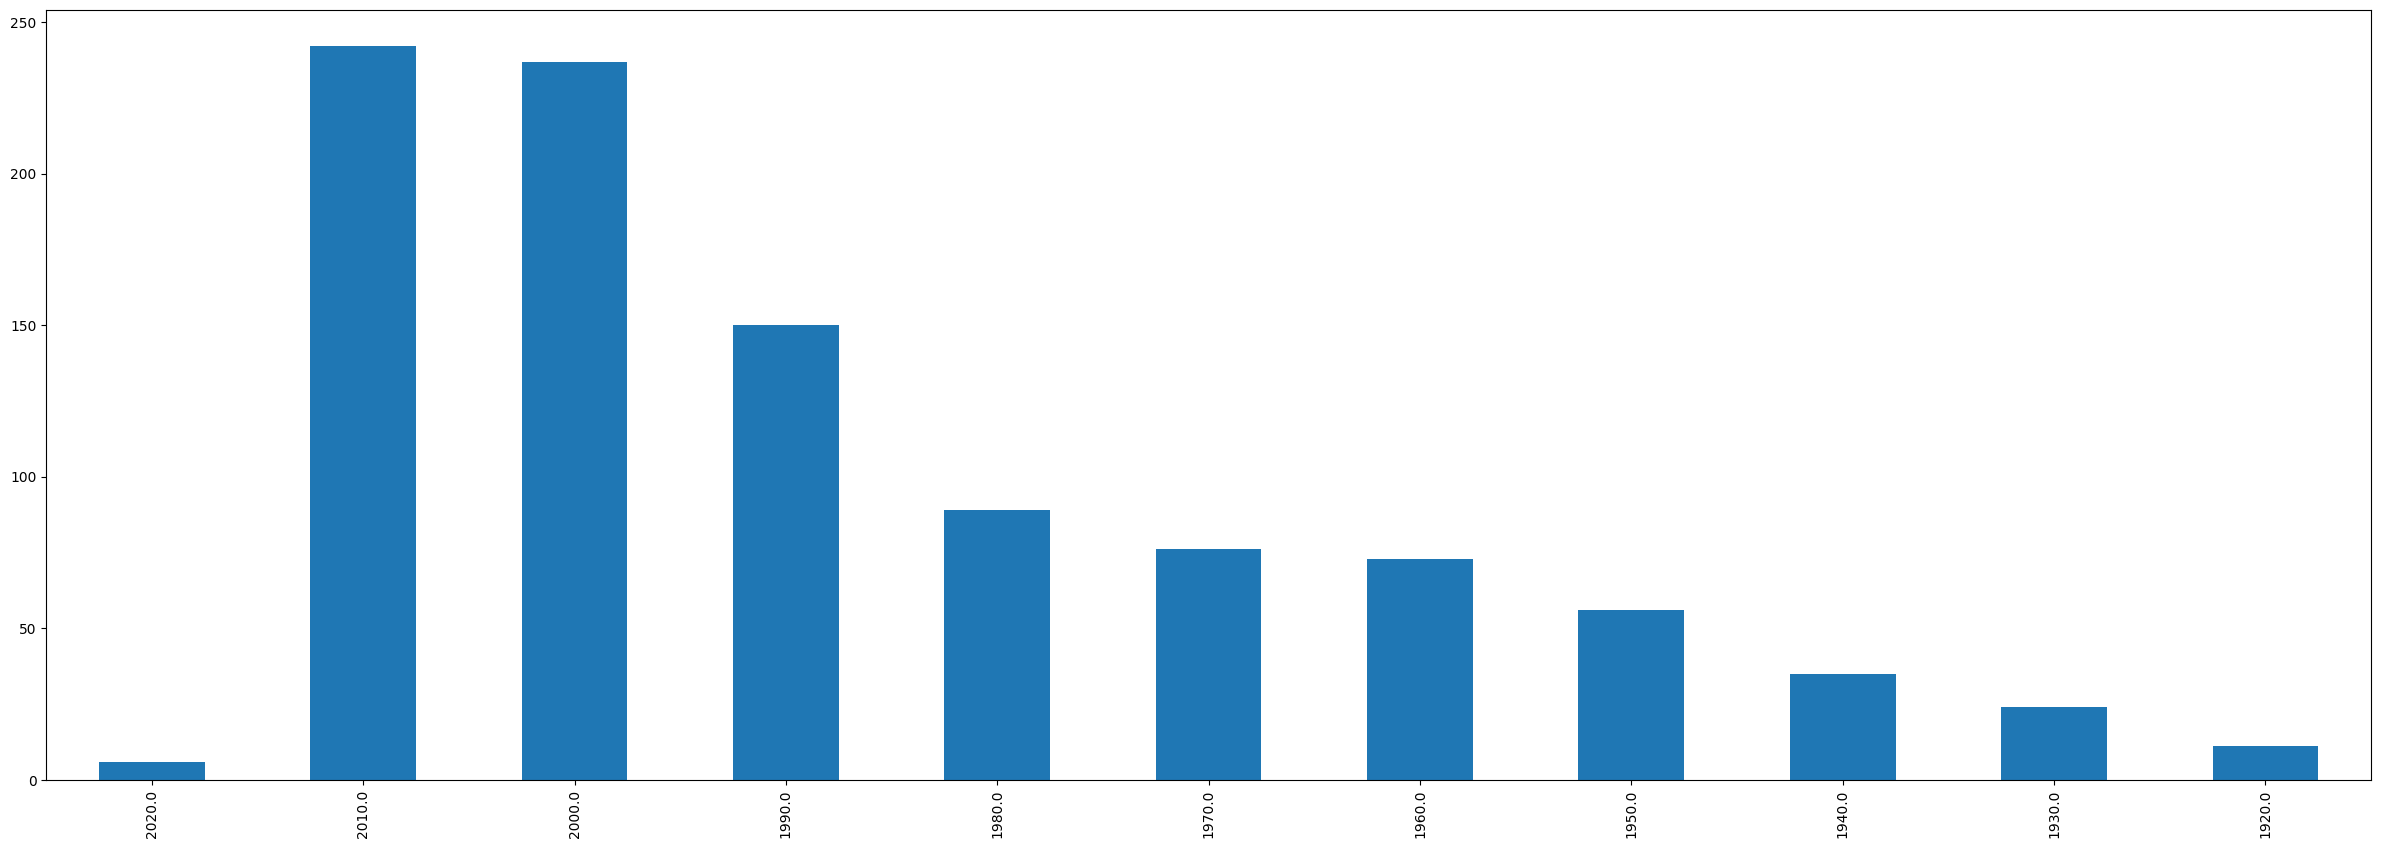

In [41]:
plt.figure(figsize = (30,10))
raw_df.Released_Decade.value_counts().sort_index(ascending=False).plot(kind = "bar")

<BarContainer object of 11 artists>

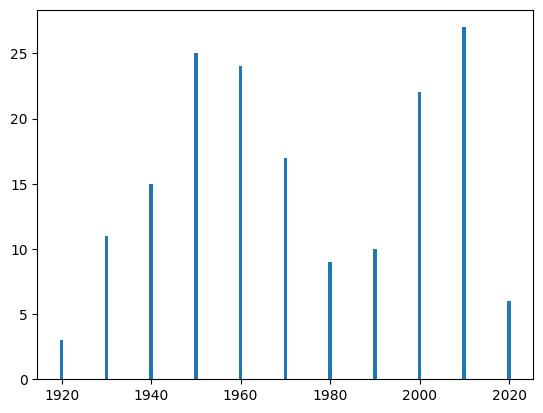

In [42]:
nulls_by_decade = raw_df[pd.isnull(raw_df["Gross"])].groupby(["Released_Decade"])["Released_Decade"].count().to_frame()
nulls_by_decade.rename(columns={"Released_Decade":"Occurrences"}, inplace=True)
nulls_by_decade.reset_index(inplace=True)
nulls_by_decade
plt.bar(nulls_by_decade["Released_Decade"], nulls_by_decade["Occurrences"])

In [43]:
raw_df = raw_df[~((pd.isnull(raw_df["Meta_score"]))&(pd.isnull(raw_df["Gross"])))].copy()

,Meta_score,Occurrences
0,51,1
1,58,1
2,59,1
3,60,1
4,62,1


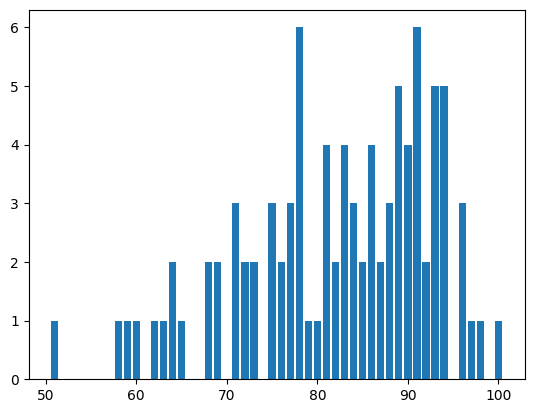

In [44]:
nulls_by_Meta_score = raw_df.loc[pd.isnull(raw_df["Gross"]),["Meta_score","Gross"]].copy() #pd.isnull(raw_df["Gross"])
nulls_by_Meta_score["Meta_score"] = nulls_by_Meta_score["Meta_score"].astype("int")
nulls_by_Meta_score = nulls_by_Meta_score[pd.isnull(nulls_by_Meta_score["Gross"])].groupby("Meta_score")["Meta_score"].count().to_frame().copy()
nulls_by_Meta_score.rename(columns={"Meta_score":"Occurrences"}, inplace=True)
nulls_by_Meta_score.reset_index(inplace=True)
plt.bar(nulls_by_Meta_score["Meta_score"], nulls_by_Meta_score["Occurrences"])
nulls_by_Meta_score.head()

In [45]:
raw_df = raw_df.loc[~pd.isnull(raw_df["Gross"])].copy()

In [46]:
raw_df = raw_df.loc[~pd.isnull(raw_df["Meta_score"])].copy()

In [47]:
raw_df.loc[pd.isnull(raw_df["Certificate"]),"Certificate"] = raw_df["Certificate"].mode().values[0]

Outliers analysis

In [ ]:
raw_df["Gross_Log"] = np.log(raw_df["Gross"])
raw_df["Gross_Log"]
plt.subplot(1,2,1)
plt.title("Boxplot for Gross in Log")
plt.boxplot(raw_df[~np.isnan(raw_df["Gross_Log"])]["Gross_Log"])
plt.subplot(1,2,2)
plt.title("Boxplot for Gross")
plt.boxplot(raw_df[~np.isnan(raw_df["Gross"])]["Gross"])
plt.show()